## 58단계: 대표적인 CNN(VGG16)

> .

### 58.1 VGG16 구현

<img src="images/그림 58-1.png" width=600/>

- `3x3 Conv 64`: 커널 크기 3x3, 출력 채널 64개
- `pool/2`: 2x2 풀링
- `Linear 4096`: 출력 크기가 4096인 FCL

In [1]:
# dezero/models.py
from dezero.models import Model
from dezero import utils
import dezero.functions as F
import dezero.layers as L

class VGG16(Model):
    def __init__(self):
        super().__init__()
        self.conv1_1 = L.Conv2d(64, kernel_size=3, stride=1, pad=1)
        self.conv1_2 = L.Conv2d(64, kernel_size=3, stride=1, pad=1)
        self.conv2_1 = L.Conv2d(128, kernel_size=3, stride=1, pad=1)
        self.conv2_2 = L.Conv2d(128, kernel_size=3, stride=1, pad=1)
        self.conv3_1 = L.Conv2d(256, kernel_size=3, stride=1, pad=1)
        self.conv3_2 = L.Conv2d(256, kernel_size=3, stride=1, pad=1)
        self.conv3_3 = L.Conv2d(256, kernel_size=3, stride=1, pad=1)
        self.conv4_1 = L.Conv2d(512, kernel_size=3, stride=1, pad=1)
        self.conv4_2 = L.Conv2d(512, kernel_size=3, stride=1, pad=1)
        self.conv4_3 = L.Conv2d(512, kernel_size=3, stride=1, pad=1)
        self.conv5_1 = L.Conv2d(512, kernel_size=3, stride=1, pad=1)
        self.conv5_2 = L.Conv2d(512, kernel_size=3, stride=1, pad=1)
        self.conv5_3 = L.Conv2d(512, kernel_size=3, stride=1, pad=1)
        self.fc6 = L.Linear(4096)
        self.fc7 = L.Linear(4096)
        self.fc8 = L.Linear(1000)

    def forward(self, x):
        x = F.relu(self.conv1_1(x))
        x = F.relu(self.conv1_2(x))
        x = F.pooling(x, 2, 2)
        x = F.relu(self.conv2_1(x))
        x = F.relu(self.conv2_2(x))
        x = F.pooling(x, 2, 2)
        x = F.relu(self.conv3_1(x))
        x = F.relu(self.conv3_2(x))
        x = F.relu(self.conv3_3(x))
        x = F.pooling(x, 2, 2)
        x = F.relu(self.conv4_1(x))
        x = F.relu(self.conv4_2(x))
        x = F.relu(self.conv4_3(x))
        x = F.pooling(x, 2, 2)
        x = F.relu(self.conv5_1(x))
        x = F.relu(self.conv5_2(x))
        x = F.relu(self.conv5_3(x))
        x = F.pooling(x, 2, 2)
        x = F.reshape(x, (x.shape[0], -1))
        x = F.dropout(F.relu(self.fc6(x)))
        x = F.dropout(F.relu(self.fc7(x)))
        x = self.fc8(x)
        return x


### 58.2 학습된 가중치 데이터

이미지넷(ImageNet)으로 학습된 VGG16 가중치를 읽어온다.

In [2]:
# dezero/models.py

class VGG16(Model):
    WEIGHTS_PATH = 'https://github.com/koki0702/dezero-models/releases/download/v0.1/vgg16.npz'
    
    def __init__(self, pretrained=False):
        ...
        
        if pretrained:
            weights_path = utils.get_file(VGG16.WEIGHTS_PATH)
            self.load_weights(weights_path)

In [3]:
import numpy as np
from dezero.models import VGG16

model = VGG16(pretrained=True)

x = np.random.randn(1, 3, 224, 224).astype(np.float32)  # 더미
model.plot(x)

Downloading: vgg16.npz
[##############################] 100.00% Done


### 58.3 학습된 VGG16 사용하기

Downloading: zebra.jpg
[##############################] 100.00% Done


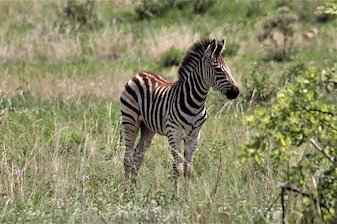

In [4]:
import dezero
from PIL import Image

url = 'https://github.com/oreilly-japan/deep-learning-from-scratch-3/raw/images/zebra.jpg'
img_path = dezero.utils.get_file(url)
img = Image.open(img_path)
img.show()

In [5]:
x = VGG16.preprocess(img)
print(type(x), x.shape)

<class 'numpy.ndarray'> (3, 224, 224)


In [6]:
x = x[np.newaxis]  # 배치용 축 추가

model = VGG16(pretrained=True)
with dezero.test_mode():
    y = model(x)
predict_id = np.argmax(y.data)

model.plot(x, to_file='vgg.pdf')  # 계산 그래프
labels = dezero.datasets.ImageNet.labels()  # ImageNet의 레이블
print(labels[predict_id])

Downloading: imagenet1000_clsidx_to_labels.txt
[##############################] 100.00% Done
zebra
